# WSCC 9-bus System Tests

## Monolithic Simulation

In [29]:
from dataprocessing.dpsim import *
from dataprocessing.plottools import *

### Read log files and list all column names

In [30]:
path_orig = '../../dpsim/Logs/'
logName_orig = 'WSCC-9bus_LeftVector'
logFilename_orig = path_orig + logName_orig + '.csv'
print(logFilename_orig)

ts_dpsim_orig = read_timeseries_dpsim(logFilename_orig)

../../dpsim/Logs/WSCC-9bus_LeftVector.csv
DPsim results real column names: []
DPsim results complex column names: ['node00000', 'node00001', 'node00002', 'node00003', 'node00004', 'node00005', 'node00006', 'node00007', 'node00008', 'node00009', 'node00010', 'node00011', 'node00012', 'node00013', 'node00014', 'node00015', 'node00016', 'node00017', 'node00018', 'node00019', 'node00020', 'node00021', 'node00022', 'node00023']
DPsim results variable number: 24
DPsim results length: 1000


### Phasors at first time step

In [31]:
phasors_orig = get_node_voltage_phasors(ts_dpsim_orig)
for node, phasor in phasors_orig.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

node00000: 14144.999844963768<4.881187893882146
node00001: 218652.68800572655<-4.143414842375251
node00002: 222225.36449260803<-3.742356042498618
node00003: 229007.03017060962<-2.3095869596822944
node00004: 17160.0<-0.0
node00005: 18450.001982962927<9.692642436165691
node00006: 229389.30872310177<3.970269975824989
node00007: 230941.4117224949<2.1041261869425463
node00008: 225202.63328926524<0.8318282747670688
node00009: 6361.175084517011<131.79212589574135
node00010: 9319.689826034393<171.58762374442506
node00011: 6617.920187625868<160.5498287205027
node00012: 219645.77911271685<-4.427552206701847
node00013: 223472.766269481<-4.001829390346095
node00014: 223000.90539583826<4.304410060682866
node00015: 227891.71607145463<4.060395701733294
node00016: 230280.24707671933<2.2551234331049232
node00017: 225516.2723874189<2.3636639121538807
node00018: 239200.0<0.0
node00019: 455.5256548235456<-48.32330959641621
node00020: 235750.00816082893<9.692642053394957
node00021: 727.9947551130434<-8.447

### Phasors at last time step

In [32]:
for node, phasor in phasors_orig.items():
    print(node + ': ' + str(phasor['abs'].values[-1]) + '<' + str(phasor['phase'].values[-1]))

node00000: 14144.999844963768<4.881187893882146
node00001: 218652.68800572655<-4.143414842375251
node00002: 222225.36449260803<-3.742356042498618
node00003: 229021.8422871578<-2.3095874821725877
node00004: 17160.0<-0.0
node00005: 18450.001982962927<9.692642436165691
node00006: 229401.43784507998<3.9702700243065685
node00007: 230951.2180755008<2.1041244375308383
node00008: 225202.6332747476<0.8318280203750997
node00009: 6361.175671809811<131.79214532915844
node00010: 9319.69081527515<171.58762464383088
node00011: 6617.920797570488<160.54983976698398
node00012: 219645.77911271685<-4.427552206701847
node00013: 223472.766269481<-4.001829390346095
node00014: 223013.034312702<4.30439193761068
node00015: 227903.84517873343<4.060390954012864
node00016: 230290.05333774048<2.255115000220725
node00017: 225526.07856663852<2.363650581626794
node00018: 239200.0<0.0
node00019: 455.5257213162063<-48.32330020183817
node00020: 235750.00816082893<9.692642053394957
node00021: 727.9947551130434<-8.44769111

### Phasors at last time step in per unit

In [33]:
nominal_voltages_orig = {'node00000': 13800, 'node00001': 230000, 'node00002': 230000, 
                         'node00003': 230000, 'node00004': 16500, 'node00005': 18000, 
                         'node00006': 230000, 'node00007': 230000, 'node00008': 230000} 
for node, nom_voltage in nominal_voltages_orig.items():
    print(node + ': ' + str(phasors_orig[node]['abs'].values[0] / nom_voltage) + '<' + str(phasors_orig[node]['phase'].values[0]))

node00000: 1.0249999887654904<4.881187893882146
node00001: 0.9506638608944633<-4.143414842375251
node00002: 0.9661972369243828<-3.742356042498618
node00003: 0.9956827398722158<-2.3095869596822944
node00004: 1.04<-0.0
node00005: 1.0250001101646071<9.692642436165691
node00006: 0.9973448205352251<3.970269975824989
node00007: 1.00409309444563<2.1041261869425463
node00008: 0.9791418838663706<0.8318282747670688


### Plot node phase
The phase at node00007 is not initialized properly since the CIM load flow data is not accurate. Therefore, the steady-state initialization implemented in the MNA solver is executed first so that the initial phase at t=0 is already very close to the correct one.
Using PI-lines with parallel impedances to ground not only during the initialization but also the simulation or more accurate CIM load flow results would probably further improve the results because the values around node00007 have still not converged completely.

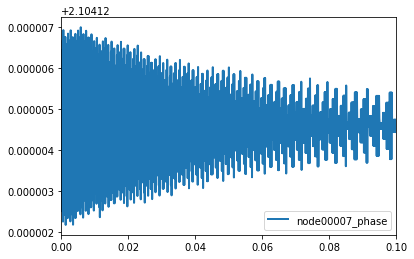

In [34]:
plot_timeseries(1, phasors_orig['node00007']['phase'])

### Plot node voltages

(210000, 240000)

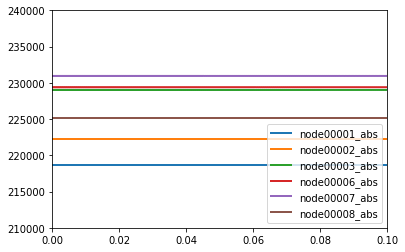

In [35]:
plot_timeseries(2, phasors_orig['node00001']['abs'])
plot_timeseries(2, phasors_orig['node00002']['abs'])
plot_timeseries(2, phasors_orig['node00003']['abs'])
plot_timeseries(2, phasors_orig['node00006']['abs'])
plot_timeseries(2, phasors_orig['node00007']['abs'])
plot_timeseries(2, phasors_orig['node00008']['abs'])
plt.gca().axes.set_ylim([210000,240000])

The results for node00001 are very good.

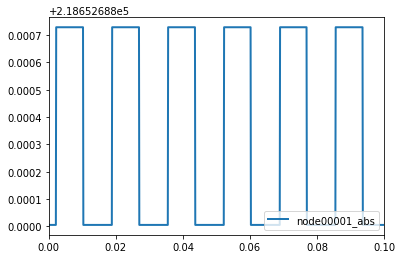

In [36]:
plot_timeseries(2, phasors_orig['node00001']['abs'])
#plt.gca().axes.set_ylim([229300,229500])